In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # solve dead Kernel
import tensorflow as tf

## Edge Detection (Sobel Filter) on Cifar10 Dataset

In [10]:
cifar = tf.keras.datasets.cifar10 # hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = cifar.load_data() 

# narrow down the training sample size
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
np.random.seed(2021)
train_size = 0.002
index = np.random.rand(len(x)) < train_size
x_train, x_test = x[index], x[~index]
y_train, y_test = y[index], y[~index]

170500096/170498071 [==============================] - 72s 0us/step


(32, 32, 3)

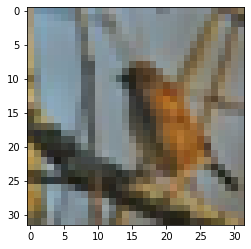

In [11]:
plt.figure()
plt.imshow(x_train[0])
x_train[0].shape

## Define vertical and horizaontal Sobel Filters

In [12]:
vertical_filter = [[-1,-2,-1],[0,0,0],[1,2,1]]
horizontal_filter = [[-1,0,1],[-2,0,2],[-1,0,1]]
n,m, d = x_train[0].shape

## Apply vertical filter

In [13]:
vertical_edges_img = np.zeros_like(x_train[0])

In [15]:
for row in range(3,n-2):
    for col in range(3,m-2):
        local_pixels = x_train[0][row-1:row+2, col-1:col+2,0]
        transformed_pixels = vertical_filter*local_pixels
        vertical_score = (transformed_pixels.sum()+4)/8
        vertical_edges_img[row,col] = [vertical_score]*3

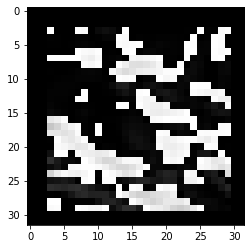

In [16]:
plt.imshow(vertical_edges_img)

## Apply horizontal Filter

In [17]:
horizontal_edges_img = np.zeros_like(x_train[0])

In [18]:
for row in range(3,n-2):
    for col in range(3,m-2):
        local_pixels = x_train[0][row-1:row+2, col-1:col+2,0]
        transformed_pixels = horizontal_filter*local_pixels
        horizontal_score = (transformed_pixels.sum()+4)/8
        horizontal_edges_img[row,col] = [horizontal_score]*3

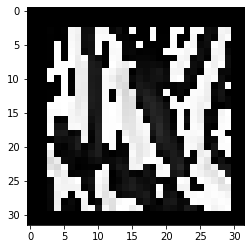

In [19]:
plt.imshow(horizontal_edges_img)

## Apply Both

In [20]:
edges_img = np.zeros_like(x_train[0])

In [22]:
for row in range(3,n-2):
        for col in range(3,m-2):
            local_pixels = x_train[0][row-1:row+2, col-1:col+2,0]
            vertical_transformed_pixels = vertical_filter*local_pixels
            vertical_score = vertical_transformed_pixels.sum()/4
            
            horizontal_transformed_pixels = horizontal_filter*local_pixels
            horizontal_score = horizontal_transformed_pixels.sum()/4
            
            edge_score = (vertical_score**2 + horizontal_score**2)**.5
            edges_img[row, col] = [edge_score]*3
edges_img = edges_img/edges_img.max()
            

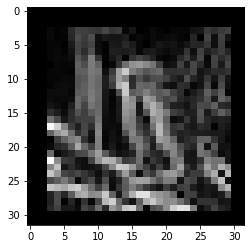

In [23]:
plt.imshow(edges_img)